In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
submit = pd.read_csv("Data/gender_submission.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data = test.append(train)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972
7,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738
8,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657
9,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871


In [10]:
data.reset_index(inplace=True, drop=True)

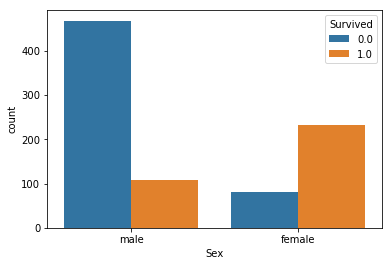

In [11]:
sns.countplot(data['Sex'], hue=data['Survived'])

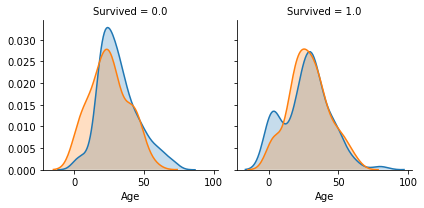

In [12]:
g=sns.FacetGrid(data, col='Survived', hue='Sex')
g.map(sns.kdeplot, 'Age', shade=True)

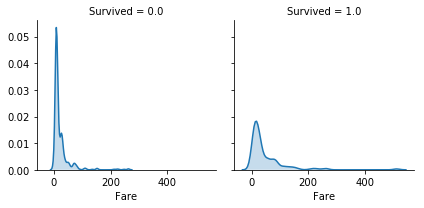

In [13]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.kdeplot, 'Fare', shade=True)

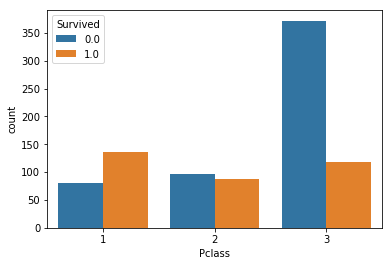

In [14]:
sns.countplot(data['Pclass'], hue=data['Survived'])

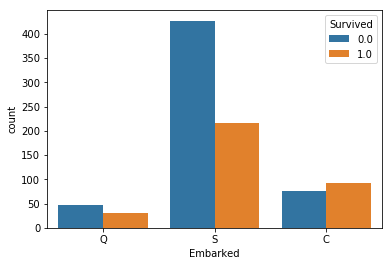

In [15]:
sns.countplot(data['Embarked'], hue=data['Survived'])

In [16]:
data['Family'] = data['SibSp'] + data['Parch'] + 1

In [17]:
data['Family_ID'] = data['Family'].apply(lambda x : 1 if x <= 2 else 0)

In [18]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Family_ID
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,1,1
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,2,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,1,1
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,1,1
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,3,0
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538,1,1
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972,1,1
7,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738,3,0
8,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657,1,1
9,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871,3,0


In [19]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [20]:
data['Embarked'] = data['Embarked'].fillna('S')

In [21]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [22]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes

In [23]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
from sklearn.ensemble import RandomForestRegressor
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family', 'Title1','Title2', 'SibSp', 'Parch']
clf = RandomForestRegressor(n_estimators=2000,random_state=42)
clf.fit(dataAgeNotNull[ageColumns], dataAgeNotNull['Age'])
ageNullValues = clf.predict(dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)
data

/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Family_ID,Title1,Title2
0,27.309989,NaN,2,7.8958,"Ilieff, Mr. Ylio",0,902,2,1,0,NaN,349220,1,1,12,2
1,54.155233,NaN,2,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,914,0,0,0,NaN,PC 17598,1,1,13,3
2,22.602520,NaN,0,21.6792,"Samaan, Mr. Elias",0,921,2,1,2,NaN,2662,3,0,12,2
3,32.737403,NaN,2,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,925,2,0,1,NaN,W./C. 6607,4,0,13,3
4,20.949909,NaN,2,8.0500,"Roth, Miss. Sarah A",0,928,2,0,0,NaN,342712,1,1,9,1
5,29.324441,NaN,2,56.4958,"Hee, Mr. Ling",0,931,2,1,0,NaN,1601,1,1,12,2
6,47.318369,D34,2,26.5500,"Franklin, Mr. Thomas Parham",0,933,0,1,0,NaN,113778,1,1,12,2
7,41.354607,NaN,1,7.7500,"Shaughnessy, Mr. Patrick",0,939,2,1,0,NaN,370374,1,1,12,2
8,29.843677,NaN,0,15.5792,"Mangiavacchi, Mr. Serafino Emilio",0,946,1,1,0,NaN,SC/A.3 2861,1,1,12,2
9,27.161488,NaN,2,16.1000,"Davison, Mr. Thomas Henry",0,950,2,1,1,NaN,386525,2,1,12,2


In [24]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [25]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family', 'Family_ID',
       'Title1', 'Title2'],
      dtype='object')

In [26]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family', 'Family_ID', 'Title2']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family', 'Family_ID', 'Title2']]

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(dataTrain.iloc[:,1:], dataTrain.iloc[:,0])

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=12)
rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('lr',lr),('rf',rf),('gnb',gnb)], voting='hard')
model.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

from sklearn.model_selection import cross_val_score
for clf, label in zip([lr, rf, gnb, model], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0], cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.02) [Logistic Regression]
Accuracy: 0.83 (+/- 0.02) [Random Forest]
Accuracy: 0.81 (+/- 0.02) [naive Bayes]


/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/sklearn/preprocessing/labe

Accuracy: 0.82 (+/- 0.03) [Ensemble]


/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
model_res =  model.predict(dataTest)
submit['Survived'] = model_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

/Users/davidchiou/anaconda/envs/test123/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
